<a href="https://colab.research.google.com/github/meteaki/Assignment/blob/master/Assignment_1_student_PoliceKillingsUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## 1: Plot number of people by gender

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
gender_s = kill.groupby(kill['gender']).sum().index
gender_s

Index(['F', 'M'], dtype='object', name='gender')

In [6]:
gender_count = kill.groupby('gender')['id'].count()
gender_count

gender
F     107
M    2428
Name: id, dtype: int64

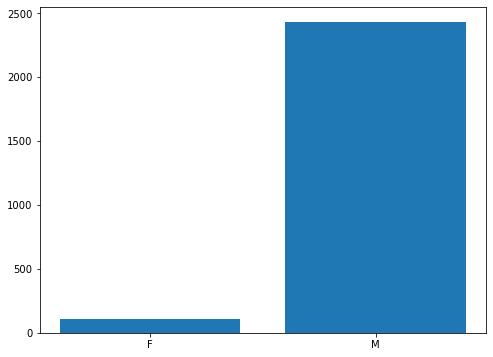

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(gender_s, gender_count);

In [8]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [9]:
kill[['armed']].value_counts().head(7)

armed         
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
dtype: int64

In [10]:
weapon = kill['armed'].value_counts().head(7).index
weapon

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

In [11]:
w_numbers = kill[['armed']].value_counts().head(7).unique()
w_numbers

array([1398,  373,  177,  171,  117,  104,   18], dtype=int64)

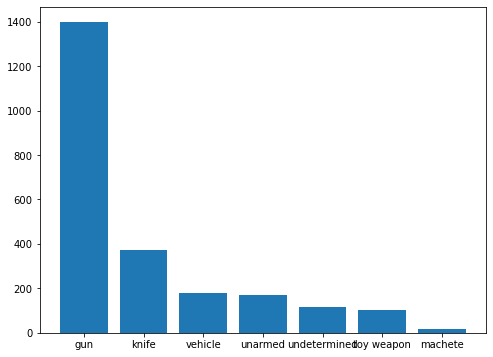

In [12]:
fig, ax = plt.subplots(figsize = (8,6))

ax.bar(weapon, w_numbers);

In [13]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [14]:
len(kill)

2535

In [15]:
kill['age'].unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 61., 56., 40., 45., 26., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., nan, 77., 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79.])

In [16]:
kill['age'].isna().sum()

77

In [17]:
kill[(kill['age'] < 25)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2789,TK TK,19/07/17,shot,gun,24.0,M,NaN,Fair Oaks,CA,False,attack,Not fleeing,False
2505,2790,Anthony Benavidez,19/07/17,shot,knife,24.0,M,NaN,Santa Fe,NM,False,other,Not fleeing,False
2509,2794,Yahir Breito,21/07/17,shot,knife,22.0,M,NaN,Santa Ana,CA,False,other,Not fleeing,False
2516,2801,Alexander J. Schoessel,25/07/17,shot,ax,23.0,M,W,Richmond,VA,True,other,Foot,False


In [18]:
below25 = (kill['age'] <= 25).sum()
below25

553

In [19]:
kill[(kill['age'] > 25)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [20]:
above25 = (kill['age'] > 25).sum()
above25

1905

In [21]:
cond_num = [above25, below25]

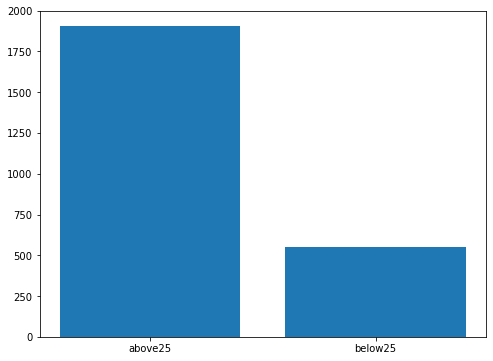

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(['above25', 'below25'], cond_num);

In [23]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [24]:
kill.value_counts('race')

race
W    1201
B     618
H     423
A      39
N      31
O      28
dtype: int64

In [25]:
race_n = kill.value_counts('race').index

In [26]:
race_t = kill.value_counts('race')

<BarContainer object of 6 artists>

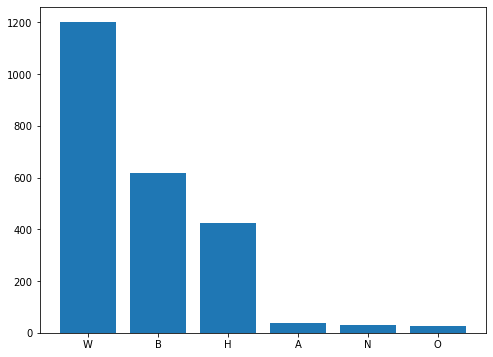

In [27]:
fig, ax = plt.subplots(figsize = (8,6))

ax.bar(race_n, race_t)

In [28]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [29]:
kill1 = kill.dropna(axis=0).copy()

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [30]:
race_name = kill1.value_counts('race').index

In [31]:
kill1.value_counts('race').values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

In [32]:
percent = kill1.value_counts('race').values/len(kill1)*100

In [33]:
kill1.value_counts('race')

race
W    1168
B     592
H     401
A      36
N      29
O      28
dtype: int64

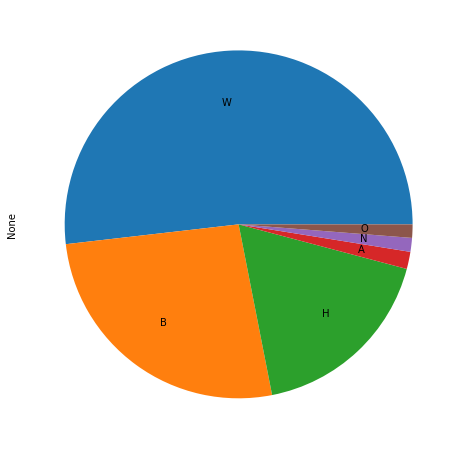

In [34]:
kill1.value_counts('race').plot.pie(subplots=True, figsize=(18,8), labeldistance=0.7);

In [35]:
# matplotlib

